In [1]:
from pathlib import Path
import struct
import zipfile
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

root = 'D:/datasets/OCR/CASIA/data'  # CASI 数据集所在根目录
root = Path(root)

In [2]:
list(root.glob('*gnt*')) # 图片的源文件

[WindowsPath('D:/datasets/OCR/CASIA/data/HWDB1.0trn_gnt.zip'),
 WindowsPath('D:/datasets/OCR/CASIA/data/HWDB1.0tst_gnt.zip'),
 WindowsPath('D:/datasets/OCR/CASIA/data/HWDB1.1trn_gnt.zip'),
 WindowsPath('D:/datasets/OCR/CASIA/data/HWDB1.1tst_gnt.zip')]

## GNT

载入 GNT 类：

In [3]:
import sys
sys.path.append('../loader')

from casia.image import GNT

选择其中一个图片数据集：

In [4]:
Z = zipfile.ZipFile(root/'HWDB1.1trn_gnt.zip')
Z.namelist()[:10]

['1001-c.gnt',
 '1002-c.gnt',
 '1003-c.gnt',
 '1004-c.gnt',
 '1005-c.gnt',
 '1006-c.gnt',
 '1007-c.gnt',
 '1008-c.gnt',
 '1009-c.gnt',
 '1010-c.gnt']

选择其中一个人写的图片数据集：

In [5]:
set_name = '1077-c.gnt'
gnt = GNT(Z, set_name)
# 获取其中的一张图片及其标签
for imgs, labels in gnt:
    break

In [8]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

可视化：

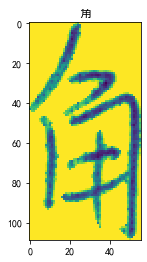

In [9]:
plt.imshow(imgs/255)
plt.title(labels)
plt.show()

统计样本个数：

In [10]:
labels = np.asanyarray([l for _, l in gnt])
# 数据个数
labels.shape[0]

3727

## 图片的预处理

In [15]:
from PIL import Image


def resize_and_normalize_image(img):
    # 补方
    pad_size = abs(img.shape[0]-img.shape[1]) // 2
    if img.shape[0] < img.shape[1]:
        pad_dims = ((pad_size, pad_size), (0, 0))
    else:
        pad_dims = ((0, 0), (pad_size, pad_size))
    img = np.lib.pad(img, pad_dims, mode='constant', constant_values=255)
    # 缩放
    img = Image.fromarray(img).resize((64 - 4*2, 64 - 4*2))  # 也可以改为 48*48
    img = np.lib.pad(img, ((4, 4), (4, 4)),
                     mode='constant', constant_values=255)
    assert img.shape == (64, 64)

    img = img.flatten()
    # 像素值范围-1到1
    img = (img - 128) / 128
    return img


def convert_to_one_hot(char):
    '''one hot'''
    vector = np.zeros(len(char_set))
    vector[char_set.index(char)] = 1
    return vector

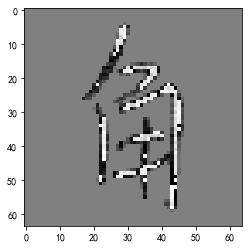

In [16]:
im = resize_and_normalize_image(imgs)

plt.imshow(im.reshape(64, 64), cmap='gray'); 

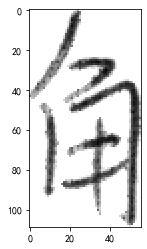

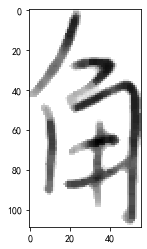

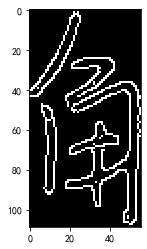

In [19]:
from cv2 import cv2

# 中值滤波 过滤噪声，保留边缘信息
plt.imshow(imgs, cmap='gray')
plt.show()
medianBlur = cv2.medianBlur(imgs, 5) 
plt.imshow(medianBlur, cmap='gray')
plt.show()
# Canny算子求得图像边缘
edges = cv2.Canny(medianBlur, 50, 150, apertureSize = 3)
plt.imshow(edges, cmap='gray')
plt.show()

- [苹果推出高精度手写识别系统，可准确识别3万字符集](https://cloud.tencent.com/developer/article/1073479)